In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.epochs):
            for i in range(len(X)):
                # Compute the output of the perceptron
                linear_output = np.dot(X[i], self.weights) + self.bias
                prediction = np.sign(linear_output)

                # If the prediction is incorrect, update weights and bias
                if prediction != y[i]:
                    self.weights += self.learning_rate * y[i] * X[i]
                    self.bias += self.learning_rate * y[i]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

# X: dataset of 3-dimensional points
# y: corresponding labels (+1 or -1)

X = np.array([[2, 3, 1], [1, 2, 2], [4, 5, 1], [3, 3, 2], [1, 1, 3], [2, 1, 2]])
y = np.array([1, 1, -1, -1, 1, -1])

perceptron = Perceptron(learning_rate=0.1, epochs=100)
perceptron.fit(X, y)
predictions = perceptron.predict(X)

print("Predictions:", predictions)


Predictions: [ 1.  1. -1. -1.  1. -1.]


In [ ]:
from itertools import combinations

def check_linearly_separable(X, y):
    perceptron = Perceptron(learning_rate=0.1, epochs=100)
    perceptron.fit(X, y)
    predictions = perceptron.predict(X)
    return np.array_equal(predictions, y)

def count_linearly_separable_combinations(X, y):
    separable_count = 0
    # Generate all possible binary label combinations (using only two labels: 1 and -1)
    for combination in combinations(range(len(y)), 2):
        temp_y = y.copy()
        temp_y[list(combination)] = np.random.choice([-1, 1], 2)
        if check_linearly_separable(X, temp_y):
            separable_count += 1
    return separable_count

X = np.array([[2, 3, 1], [1, 2, 2], [4, 5, 1], [3, 3, 2], [1, 1, 3], [2, 1, 2]])
y = np.array([1, 1, -1, -1, 1, -1])

print("Number of linearly separable combinations:", count_linearly_separable_combinations(X, y))


Number of linearly separable combinations: 12


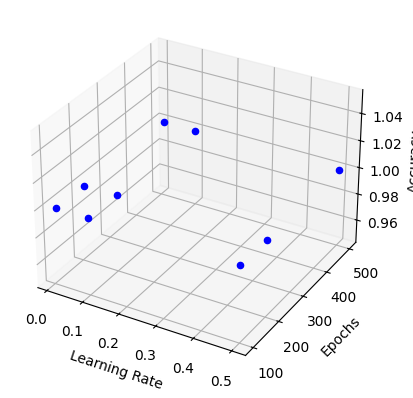

In [ ]:
import matplotlib.pyplot as plt

def analyze_convergence(X, y, learning_rates, epochs_range):
    accuracies = []

    for lr in learning_rates:
        for epoch in epochs_range:
            perceptron = Perceptron(learning_rate=lr, epochs=epoch)
            perceptron.fit(X, y)
            predictions = perceptron.predict(X)
            accuracy = np.mean(predictions == y)
            accuracies.append((lr, epoch, accuracy))

    # Plotting the results
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for lr, epoch, accuracy in accuracies:
        ax.scatter(lr, epoch, accuracy, c='b', marker='o')

    ax.set_xlabel('Learning Rate')
    ax.set_ylabel('Epochs')
    ax.set_zlabel('Accuracy')
    plt.show()

learning_rates = [0.01, 0.1, 0.5]
epochs_range = [100, 200, 500]
analyze_convergence(X, y, learning_rates, epochs_range)
